### LSTM - Room Temperature

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('MLTempDataset1.csv',index_col='Datetime',parse_dates=True)

In [5]:
df.head()

,Unnamed: 0,Hourly_Temp
Datetime,,
2022-01-04 00:00:00,0,20.867
2022-01-04 01:00:00,1,21.000
2022-01-04 02:00:00,2,20.867
2022-01-04 03:00:00,3,20.650
2022-01-04 04:00:00,4,20.400


In [6]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

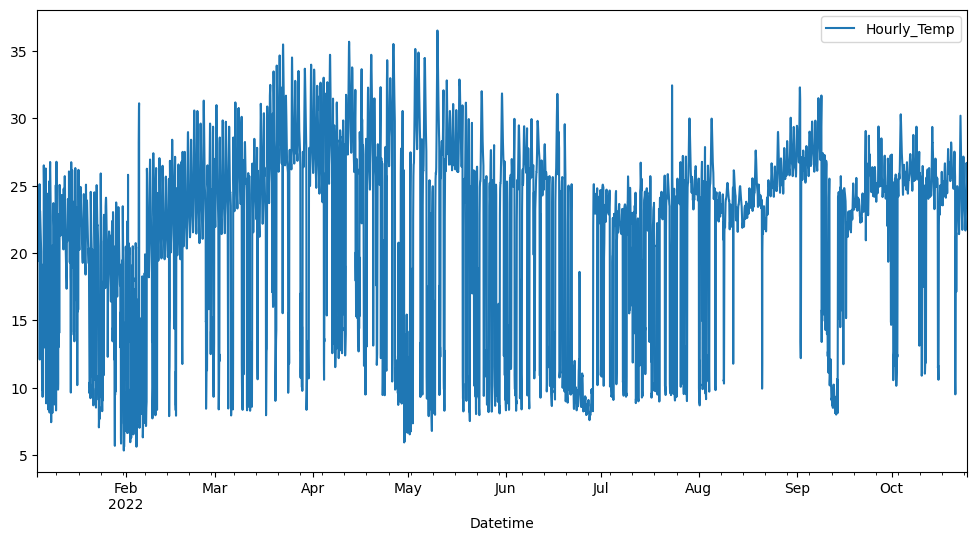

In [8]:
df.plot(figsize=(12,6));

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

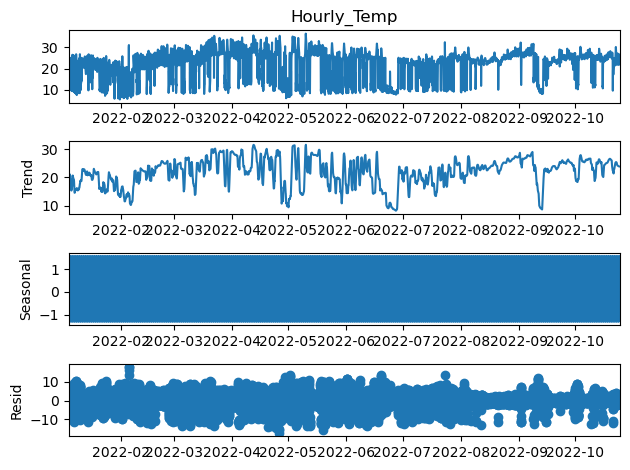

In [10]:
results = seasonal_decompose(df['Hourly_Temp'])
results.plot();

In [11]:
len(df)

7056

In [12]:
train = df.iloc[:5645]
test = df.iloc[5645:]

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
df.head(),df.tail()

(                     Hourly_Temp
 Datetime                        
 2022-01-04 00:00:00       20.867
 2022-01-04 01:00:00       21.000
 2022-01-04 02:00:00       20.867
 2022-01-04 03:00:00       20.650
 2022-01-04 04:00:00       20.400,
                      Hourly_Temp
 Datetime                        
 2022-10-24 19:00:00       25.567
 2022-10-24 20:00:00       25.183
 2022-10-24 21:00:00       24.600
 2022-10-24 22:00:00       23.986
 2022-10-24 23:00:00       23.383)

In [15]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
scaled_train[:10]

array([[0.49813804],
       [0.5024077 ],
       [0.49813804],
       [0.49117175],
       [0.48314607],
       [0.47351525],
       [0.46388443],
       [0.45425361],
       [0.45104334],
       [0.45425361]])

In [16]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [18]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49813804 0.5024077  0.49813804]
Predict this y: 
 [[0.49117175]]


In [19]:
X.shape

(1, 3, 1)

In [20]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [22]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(generator,epochs=10)

Epoch 1/10
5633/5633 [==============================] - 38s 7ms/step - loss: 0.0094
Epoch 2/10
5633/5633 [==============================] - 37s 7ms/step - loss: 0.0088
Epoch 3/10
5633/5633 [==============================] - 44s 8ms/step - loss: 0.0086
Epoch 4/10
5633/5633 [==============================] - 40s 7ms/step - loss: 0.0086
Epoch 5/10
5633/5633 [==============================] - 36s 6ms/step - loss: 0.0085
Epoch 6/10
5633/5633 [==============================] - 41s 7ms/step - loss: 0.0085
Epoch 7/10
5633/5633 [==============================] - 48s 8ms/step - loss: 0.0084
Epoch 8/10
5633/5633 [==============================] - 40s 7ms/step - loss: 0.0084
Epoch 9/10
5633/5633 [==============================] - 63s 11ms/step - loss: 0.0084
Epoch 10/10
5633/5633 [==============================] - 66s 12ms/step - loss: 0.0084


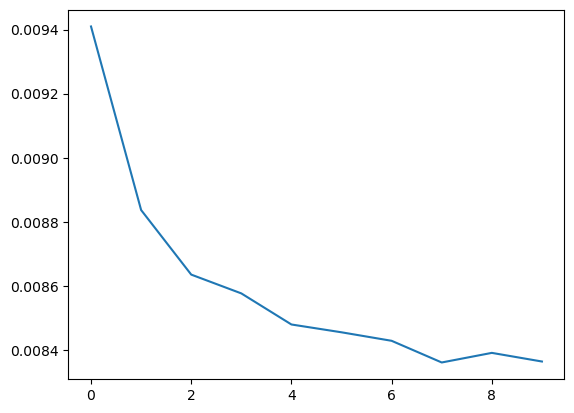

In [30]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch);

In [31]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

1/1 [==============================] - 0s 369ms/step


array([[0.6354629]], dtype=float32)

In [32]:
scaled_test[0]

array([0.65865169])

In [33]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 32ms/step


In [34]:
test_predictions

[array([0.6354629], dtype=float32),
 array([0.58976024], dtype=float32),
 array([0.54663664], dtype=float32),
 array([0.51270735], dtype=float32),
 array([0.48645607], dtype=float32),
 array([0.4653618], dtype=float32),
 array([0.4477311], dtype=float32),
 array([0.43266258], dtype=float32),
 array([0.41968578], dtype=float32),
 array([0.40848416], dtype=float32),
 array([0.39883018], dtype=float32),
 array([0.3904913], dtype=float32),
 array([0.38308176], dtype=float32),
 array([0.37622806], dtype=float32),
 array([0.36976707], dtype=float32),
 array([0.36371902], dtype=float32),
 array([0.3581546], dtype=float32),
 array([0.35311687], dtype=float32),
 array([0.34860647], dtype=float32),
 array([0.34459347], dtype=float32),
 array([0.3410344], dtype=float32),
 array([0.33788288], dtype=float32),
 array([0.3350954], dtype=float32),
 array([0.33263257], dtype=float32),
 array([0.3304571], dtype=float32),
 array([0.32853276], dtype=float32),
 array([0.32682574], dtype=float32),
 array([0

In [35]:
test.head()

,Hourly_Temp
Datetime,
2022-08-27 05:00:00,25.867
2022-08-27 06:00:00,25.500
2022-08-27 07:00:00,25.233
2022-08-27 08:00:00,25.080
2022-08-27 09:00:00,25.017


In [36]:
true_predictions = scaler.inverse_transform(test_predictions)

In [37]:
test['Predictions'] = true_predictions

C:\Users\unlu-\AppData\Local\Temp\ipykernel_14276\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


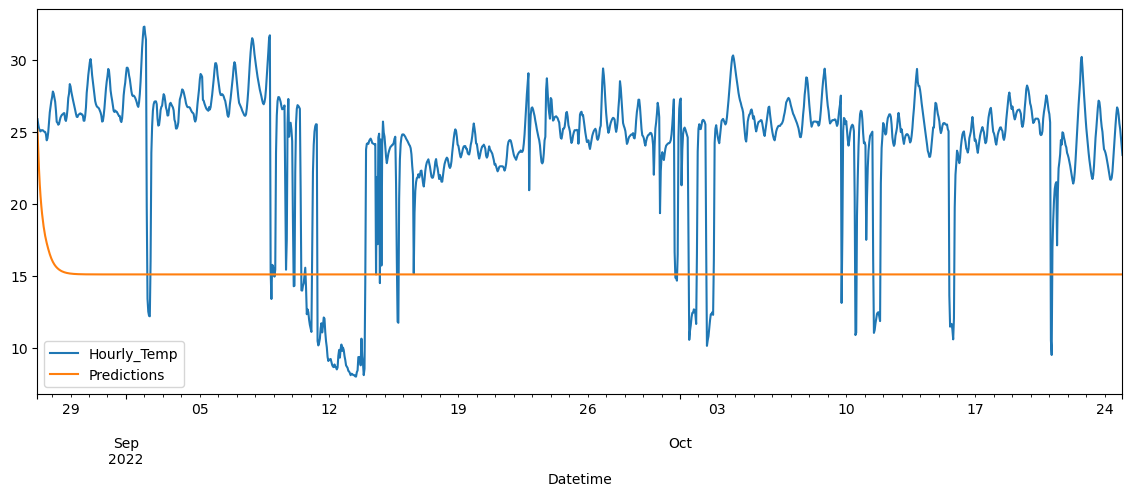

In [39]:
test.plot(figsize=(14,5));

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Hourly_Temp'],test['Predictions']))
print(rmse)

10.03073006678938
